In [16]:
import pandas as pd

In [17]:
data=pd.read_csv("Multitarget-CONAN.csv")

In [18]:
data

INDEX                                        HATE_SPEECH  \
0         0  Maybe the UN could talk to those asian and afr...   
1         1  ‘Juice (Jews) are worse that nukes.’ Caption t...   
2         2  Foreigners on UK benefits leaps 41% in 5 years...   
3         3  Jews cannot be patriots, since their allegianc...   
4         4  Israel, Zionism and Jewish Supremacist control...   
...     ...                                                ...   
4998   4998                     Woman are basically childlike.   
4999   4999                 women should be submissive to men.   
5000   5000  Women are essentially childlike, unable to und...   
5001   5001                 Women should be submissive to men.   
5002   5002  Women should not be allowed to vote, this is a...   

                                      COUNTER_NARRATIVE    TARGET VERSION  
0     You're right, ocean pollution is one of the ma...     other      V1  
1                           You'd rather be nuked then?      JEWS      V1  
2     You seem to be worried about government expend...  MIGRANTS      V1  
3     You can have parents and grandparents born els...      JEWS      V1  
4     Wouldn't you say its colonialism from many dif...      JEWS      V1  
...                                                 ...       ...     ...  
4998  They are not childlike and are capable of grea...     WOMEN  V6_mix  
4999  There are many women who want to be "submissiv...     WOMEN  V6_mix  
5000  Maybe you should try talking to a woman instea...     WOMEN  V6_mix  
5001  Women are human beings deserving respect and e...     WOMEN  V6_mix  
5002  I don't think that a country can be 'male domi...     WOMEN  V6_mix  

[5003 rows x 5 columns]

In [19]:
data.TARGET.value_counts()

MUSLIMS     1335
MIGRANTS     957
WOMEN        662
LGBT+        617
JEWS         594
POC          352
other        266
DISABLED     220
Name: TARGET, dtype: int64

In [20]:
k=data.TARGET.value_counts()
k=k.to_dict()
k

{'MUSLIMS': 1335,
 'MIGRANTS': 957,
 'WOMEN': 662,
 'LGBT+': 617,
 'JEWS': 594,
 'POC': 352,
 'other': 266,
 'DISABLED': 220}

In [21]:
import pandas as pd
import nltk
import re
import string
from nltk.corpus import stopwords
nltk.download('punkt')
nltk.download('stopwords')
from nltk.tokenize import word_tokenize
import preprocessor as p
from nltk.stem import WordNetLemmatizer 
from nltk import sent_tokenize
from nltk import word_tokenize

stop_words = stopwords.words()

def cleaning(text):        
    # converting to lowercase, removing URL links, special characters, punctuations...
    
    #using full form in place of abbrevations
    text = re.sub(r"won't", "will not",text)
    text = re.sub(r"can\'t", "can not",text)
    text = re.sub(r"n\'t", " not",text)
    text = re.sub(r"\'re", " are",text)
    text = re.sub(r"\'s", " is",text)
    text = re.sub(r"\'d", " would",text)
    text = re.sub(r"\'ll", " will",text)
    text = re.sub(r"\'t", " not",text)
    text = re.sub(r"\'ve", " have",text)
    text = re.sub(r"\'m", " am",text)
    text = re.sub('RT'," ", text)
    text = re.sub('gt'," ", text)
    text=p.clean(text)
    text = re.sub("\$RESERVED\$ \$MENTION\$|\$NUMBER\$|\$MENTION\$",' ', text)
    text = text.lower()
    text = re.sub('https?://\S+|www\.\S+', ' ', text)
    text = re.sub('<.*?>+', ' ', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), ' ', text)
    text = re.sub('\n', ' ', text)
    text = re.sub('[’“”…]', ' ', text)   
    
    
    text = re.sub('user'," ", text)
    text = re.sub('url'," ", text)
    
    text = re.sub('reserved'," ", text)
    
    
    
    
    
    
    text = re.sub("[^A-Za-z]",' ',text)
    

    # removing the emojies               
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    text = emoji_pattern.sub(r' ', text)   
    
    
    
    
    
    
    return text



[nltk_data] Downloading package punkt to
[nltk_data]     /Users/ravitiwari/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/ravitiwari/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [22]:
#stop = stopwords.words('english')
#data.HATE_SPEECH=data.HATE_SPEECH.apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
data.HATE_SPEECH=data.HATE_SPEECH.apply(cleaning)

In [23]:
import nltk
from nltk.stem import WordNetLemmatizer 
from nltk import sent_tokenize
from nltk import word_tokenize

nltk.download("wordnet")
#from nltk.corpus import wordnet
#from wordnet import Dictionary
lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/ravitiwari/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [24]:
def lemma(text):
    word_list = nltk.word_tokenize(text)
    #print(word_list)
    lemmatized_output = ' '.join([lemmatizer.lemmatize(w) for w in word_list])
    #print(lemmatized_output)
    return lemmatized_output

In [25]:
data['HATE_SPEECH']=data['HATE_SPEECH'].apply(lemma)
data.head()

INDEX                                        HATE_SPEECH  \
0      0  maybe the un could talk to those asian and afr...   
1      1  juice jew are worse that nuke caption to a mem...   
2      2  foreigner on uk benefit leap in year with over...   
3      3  jew can not be patriot since their allegiance ...   
4      4  israel zionism and jewish supremacist control ...   

                                   COUNTER_NARRATIVE    TARGET VERSION  
0  You're right, ocean pollution is one of the ma...     other      V1  
1                        You'd rather be nuked then?      JEWS      V1  
2  You seem to be worried about government expend...  MIGRANTS      V1  
3  You can have parents and grandparents born els...      JEWS      V1  
4  Wouldn't you say its colonialism from many dif...      JEWS      V1

In [26]:
def create_data(data,target):
    mask=data.TARGET==target
    data1=data.loc[mask]
    return data1

In [27]:
data1=create_data(data,"MUSLIMS")
data2=create_data(data,"MIGRANTS")
data3=create_data(data,"WOMEN")
data4=create_data(data,"LGBT+")
data5=create_data(data,"JEWS")
data6=create_data(data,"POC")
data7=create_data(data,"other")
data8=create_data(data,"DISABLED")


In [28]:
data1

INDEX                                        HATE_SPEECH  \
168     168  you probably have not seen the vids where thes...   
169     169  muslim have a bad reputation and there will be...   
170     170  muslim demand local to not walk their dog in p...   
171     171  muslim are asking too much their sharia ha rul...   
172     172  apple and orange are not the same and culture ...   
...     ...                                                ...   
4970   4970  we can no longer accept muslim living in our c...   
4971   4971  how can we be sure that muslim terrorist are n...   
4972   4972  islam is a totalitarian ideology that promotes...   
4973   4973  islam is a totalitarian ideology that should b...   
4974   4974  muslim are not welcome in our country they hav...   

                                      COUNTER_NARRATIVE   TARGET VERSION  
168   Animal cruelty isn't right but it also isn't a...  MUSLIMS      V1  
169   The act of killing dogs with acid is serious, ...  MUSLIMS      V1  
170   This was a prank planned by non-muslims on 4ch...  MUSLIMS      V1  
171   You have to be careful about what you read! Th...  MUSLIMS      V1  
172   You can find outdated teaching in all major re...  MUSLIMS      V1  
...                                                 ...      ...     ...  
4970  Muslim terrorists have struck in Paris and Lon...  MUSLIMS  V6_mix  
4971  We should be very careful of what we assume. W...  MUSLIMS  V6_mix  
4972  This is just a myth used to promote hatred and...  MUSLIMS  V6_mix  
4973       Muslims have the same rights as anyone else.  MUSLIMS  V6_mix  
4974  People are free to choose their own beliefs, a...  MUSLIMS  V6_mix  

[1335 rows x 5 columns]

In [29]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS,ImageColorGenerator

In [30]:
from collections import Counter
p = Counter(" ".join(data1.HATE_SPEECH).split()).most_common(200)
rslt_0 = pd.DataFrame(p, columns=['Word', 'Frequency'])
rslt_0

Word  Frequency
0    muslim        881
1         a        724
2        is        692
3       are        680
4     islam        489
..      ...        ...
195  spread          9
196    keep          9
197    time          9
198  taking          9
199   worst          9

[200 rows x 2 columns]

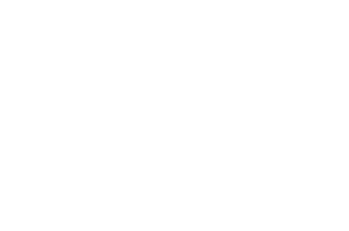

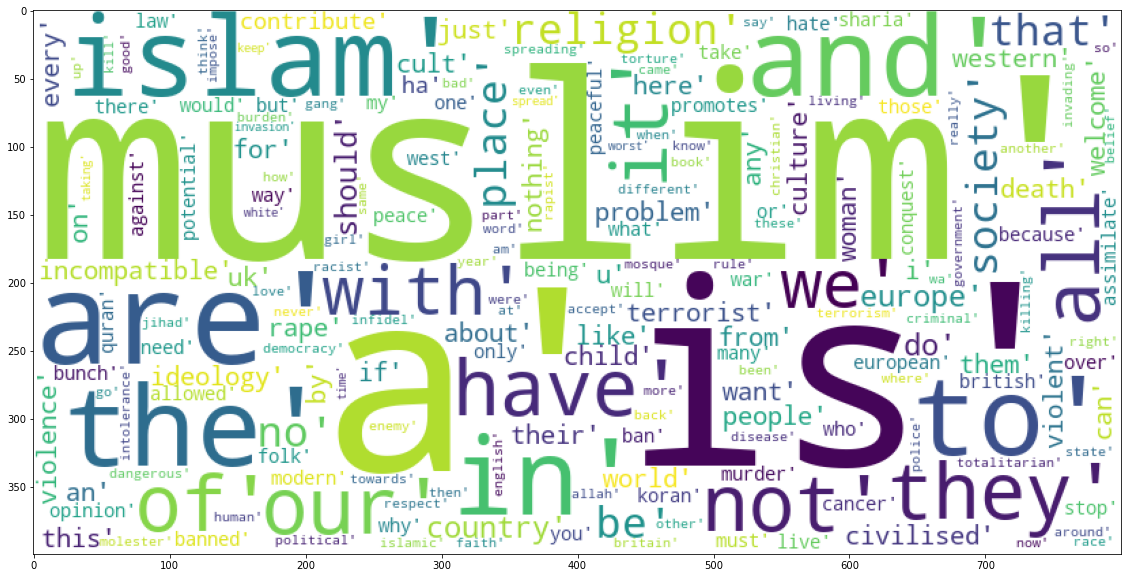

In [31]:
k=list(rslt_0.Word)
wordcloud = WordCloud( background_color="white", width=800, height=400).generate(str(k))
plt.axis("off")
plt.figure( figsize=(20,10))
plt.tight_layout(pad=0)
plt.imshow(wordcloud)
plt.show()

In [32]:
data2

INDEX                                        HATE_SPEECH  \
2         2  foreigner on uk benefit leap in year with over...   
6         6  foreigner on uk benefit leap in year with over...   
29       29  pakistan million nigeria million bangladesh mi...   
31       31  pakistan million nigeria million bangladesh mi...   
32       32  pakistan million nigeria million bangladesh mi...   
...     ...                                                ...   
4953   4953                               migrant take our job   
4954   4954        migrant steal our job by accepting low wage   
4955   4955               illegal immigrant make america worse   
4956   4956  migrant rape our woman and are flooding our co...   
4957   4957    migrant rape our woman time more than u citizen   

                                      COUNTER_NARRATIVE    TARGET VERSION  
2     You seem to be worried about government expend...  MIGRANTS      V1  
6     Would be intersting to see how much money "for...  MIGRANTS      V1  
29    this is correct, but their percentage of the p...  MIGRANTS      V1  
31    These groups tend to be a minority in Britian....  MIGRANTS      V1  
32    These are numbers of residents in countries, n...  MIGRANTS      V1  
...                                                 ...       ...     ...  
4953  If we worked more closely with migrants, we co...  MIGRANTS  V6_mix  
4954  Most migrant workers are paid a decent wage bu...  MIGRANTS  V6_mix  
4955  Don't you belieive that immigration brings ben...  MIGRANTS  V6_mix  
4956  The people you are referring to are rapists an...  MIGRANTS  V6_mix  
4957  I can't see how it is possible that foreign na...  MIGRANTS  V6_mix  

[957 rows x 5 columns]

In [33]:
from collections import Counter
p = Counter(" ".join(data2.HATE_SPEECH).split()).most_common(200)
rslt_1 = pd.DataFrame(p, columns=['Word', 'Frequency'])
rslt_1

Word  Frequency
0         are        614
1         our        473
2          to        413
3     migrant        391
4         the        360
..        ...        ...
195         k          8
196    handed          8
197   payouts          8
198  nonsense          8
199  pakistan          8

[200 rows x 2 columns]

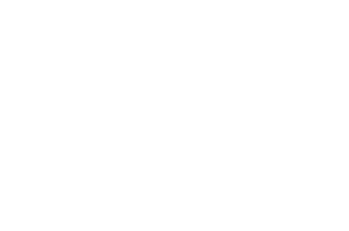

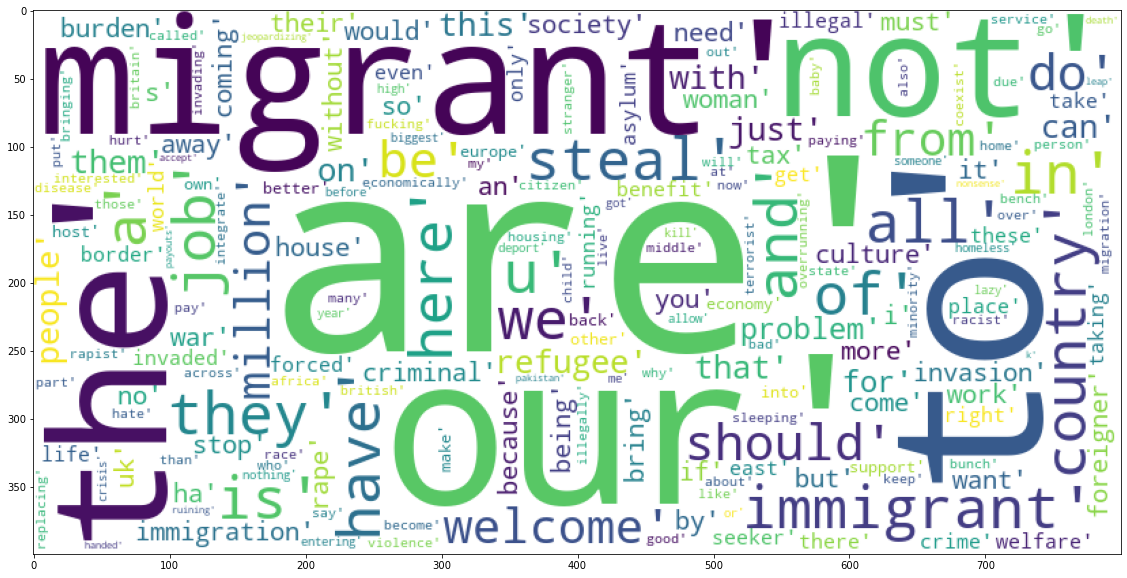

In [34]:
k=list(rslt_1.Word)
wordcloud = WordCloud( background_color="white", width=800, height=400).generate(str(k))
plt.axis("off")
plt.figure( figsize=(20,10))
plt.tight_layout(pad=0)
plt.imshow(wordcloud)
plt.show()

In [35]:
data3

INDEX                                        HATE_SPEECH  \
5         5  woman are basically childlike they remain this...   
8         8  who the fuck are you we are gutful sick of vag...   
9         9  woman are basically childlike they remain this...   
10       10  who the fuck are you we are gutful sick of vag...   
13       13  we began to break down when we allowed woman t...   
...     ...                                                ...   
4998   4998                      woman are basically childlike   
4999   4999                  woman should be submissive to men   
5000   5000  woman are essentially childlike unable to unde...   
5001   5001                  woman should be submissive to men   
5002   5002  woman should not be allowed to vote this is a ...   

                                      COUNTER_NARRATIVE TARGET VERSION  
5     Would you say the same thing to the women who ...  WOMEN      V1  
8                  Without women there would be no men.  WOMEN      V1  
9     WIthout softeness and emotions there would jus...  WOMEN      V1  
10    What makes you think that women are jealous of...  WOMEN      V1  
13    Who is 'we', surely it was men and women worki...  WOMEN      V1  
...                                                 ...    ...     ...  
4998  They are not childlike and are capable of grea...  WOMEN  V6_mix  
4999  There are many women who want to be "submissiv...  WOMEN  V6_mix  
5000  Maybe you should try talking to a woman instea...  WOMEN  V6_mix  
5001  Women are human beings deserving respect and e...  WOMEN  V6_mix  
5002  I don't think that a country can be 'male domi...  WOMEN  V6_mix  

[662 rows x 5 columns]

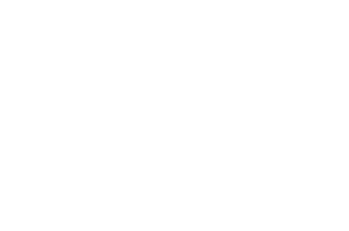

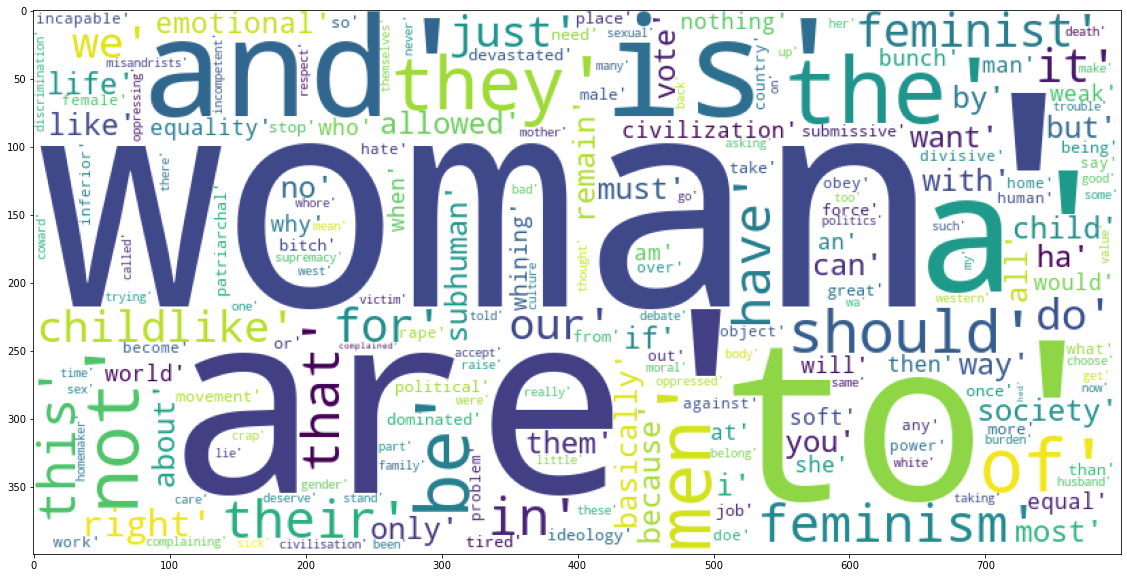

In [36]:
from collections import Counter
p = Counter(" ".join(data3.HATE_SPEECH).split()).most_common(200)
rslt_2= pd.DataFrame(p, columns=['Word', 'Frequency'])
#print(rslt_2)
k=list(rslt_2.Word)
wordcloud = WordCloud( background_color="white", width=800, height=400).generate(str(k))
plt.axis("off")
plt.figure( figsize=(20,10))
plt.tight_layout(pad=0)
plt.imshow(wordcloud)
plt.show()

In [37]:
rslt_2

Word  Frequency
0          woman        554
1            are        420
2             to        338
3              a        331
4            and        307
..           ...        ...
195        white          6
196   themselves          6
197  incompetent          6
198   complained          6
199          hed          6

[200 rows x 2 columns]

In [38]:
data4

INDEX                                        HATE_SPEECH  \
24       24  uk education secretary all child from the age ...   
27       27  since when ha abusing the anus a a sex organ b...   
30       30  uk education secretary all child from the age ...   
45       45  uk education secretary all child from the age ...   
49       49  uk education secretary all child from the age ...   
...     ...                                                ...   
4941   4941  gay are some kind of devil worshipper we shoul...   
4942   4942  gay are some kind of devil worshipper we shoul...   
4943   4943              that gay men deserve to be called fag   
4944   4944                            gay pride is so awkward   
4945   4945                        all gay people are criminal   

                                      COUNTER_NARRATIVE TARGET VERSION  
24    We are always developing as time goes on and s...  LGBT+      V1  
27    To recognise and accept practices that we don'...  LGBT+      V1  
30    This is about teaching children about the worl...  LGBT+      V1  
45    Teaching children that there are different way...  LGBT+      V1  
49    Same sex relationship happen within many speci...  LGBT+      V1  
...                                                 ...    ...     ...  
4941  Why do you think it's right to ban someone for...  LGBT+  V6_mix  
4942  How do you know that they are practicing devil...  LGBT+  V6_mix  
4943  Just because you personally don't like gay peo...  LGBT+  V6_mix  
4944  I think you are talking about the parade, not ...  LGBT+  V6_mix  
4945  How can you derive this from someone's sexual ...  LGBT+  V6_mix  

[617 rows x 5 columns]

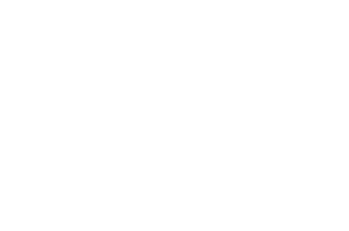

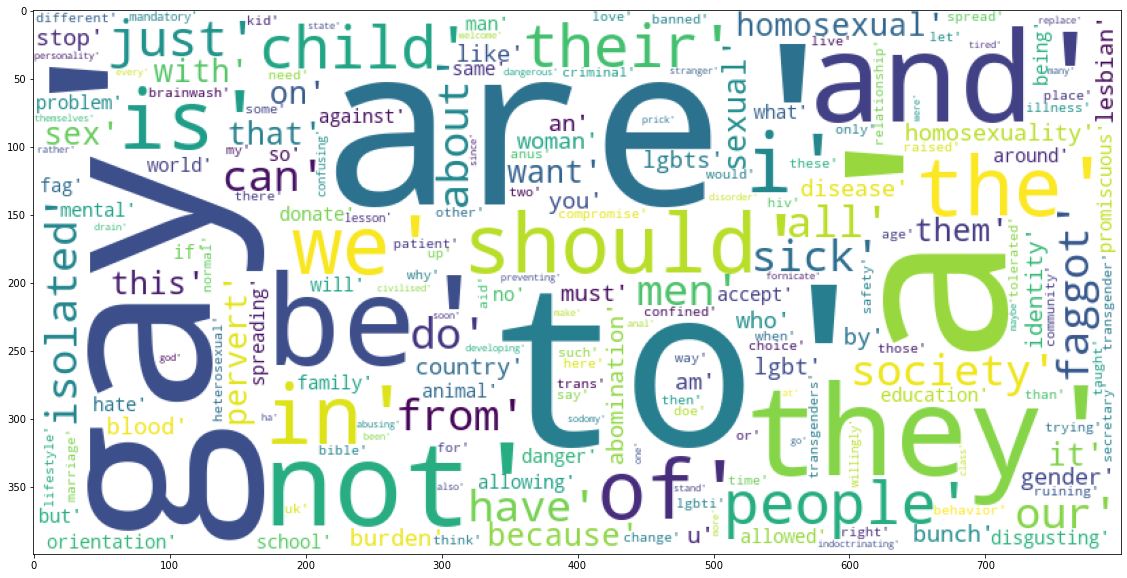

In [39]:
from collections import Counter
p = Counter(" ".join(data4.HATE_SPEECH).split()).most_common(200)
rslt_3= pd.DataFrame(p, columns=['Word', 'Frequency'])
#print(rslt_3)
k=list(rslt_3.Word)
wordcloud = WordCloud( background_color="white", width=800, height=400).generate(str(k))
plt.axis("off")
plt.figure( figsize=(20,10))
plt.tight_layout(pad=0)
plt.imshow(wordcloud)
plt.show()

In [40]:
rslt_3

Word  Frequency
0        are        405
1        gay        339
2         to        299
3          a        281
4       they        216
..       ...        ...
195    maybe          6
196   sodomy          6
197    every          6
198  replace          6
199     anal          6

[200 rows x 2 columns]

In [41]:
data5

INDEX                                        HATE_SPEECH  \
1         1  juice jew are worse that nuke caption to a mem...   
3         3  jew can not be patriot since their allegiance ...   
4         4  israel zionism and jewish supremacist control ...   
12       12  whats the difference between a cow and the hol...   
14       14  jew like to cordon off area for themselves whe...   
...     ...                                                ...   
4925   4925                              jew control hollywood   
4926   4926  jew allegedly deported in concentration camp w...   
4927   4927  we must protect our people and culture from th...   
4928   4928  jew have always controlled the government and ...   
4929   4929  jew control the world is news medium hollywood...   

                                      COUNTER_NARRATIVE TARGET VERSION  
1                           You'd rather be nuked then?   JEWS      V1  
3     You can have parents and grandparents born els...   JEWS      V1  
4     Wouldn't you say its colonialism from many dif...   JEWS      V1  
12    We should be respectful and compassionate towa...   JEWS      V1  
14    Which suggests that white people like to cordo...   JEWS      V1  
...                                                 ...    ...     ...  
4925  Hollywood is an extremely diverse industry, an...   JEWS  V6_mix  
4926  Can you point out which Jewish people that hav...   JEWS  V6_mix  
4927  So you want to see millions of Jews murdered e...   JEWS  V6_mix  
4928  Jews are not in charge of the media or the gov...   JEWS  V6_mix  
4929  In principle, Jewish people are part of the sy...   JEWS  V6_mix  

[594 rows x 5 columns]

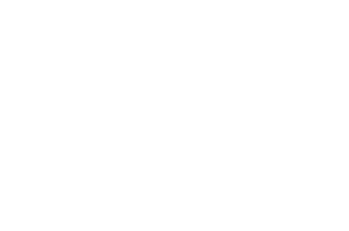

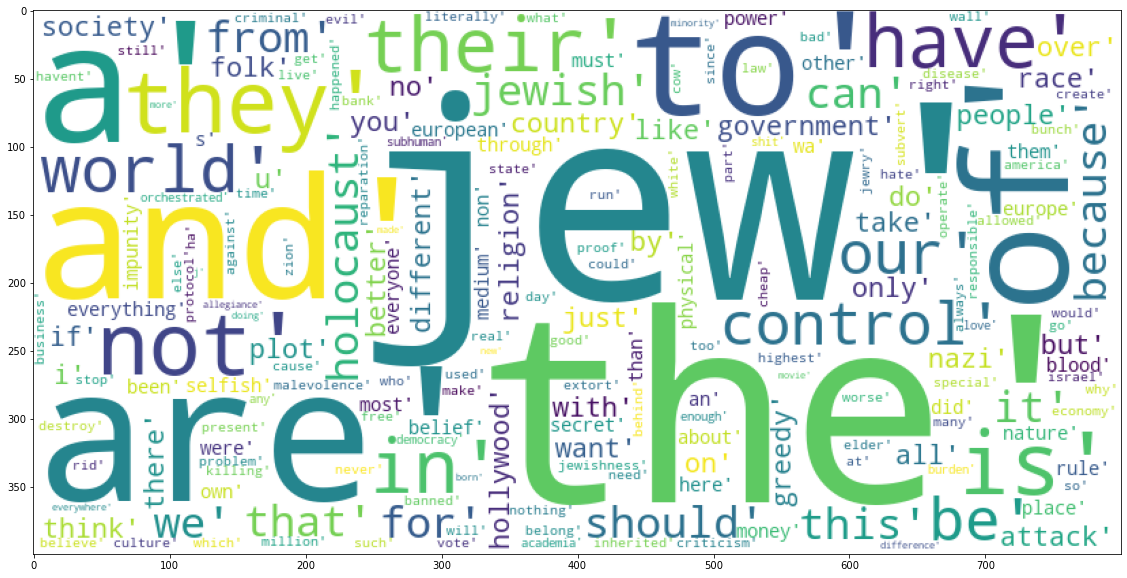

In [42]:
from collections import Counter
p = Counter(" ".join(data5.HATE_SPEECH).split()).most_common(200)
rslt_4= pd.DataFrame(p, columns=['Word', 'Frequency'])
#print(rslt_4)
k=list(rslt_4.Word)
wordcloud = WordCloud( background_color="white", width=800, height=400).generate(str(k))
plt.axis("off")
plt.figure( figsize=(20,10))
plt.tight_layout(pad=0)
plt.imshow(wordcloud)
plt.show()

In [43]:
rslt_4

Word  Frequency
0           jew        517
1           the        412
2           are        356
3           and        262
4             a        225
..          ...        ...
195       doing          6
196       movie          6
197  everywhere          6
198        born          6
199        made          6

[200 rows x 2 columns]

In [44]:
data6

INDEX                                        HATE_SPEECH  \
7         7  race is a social construct and if you see any ...   
44       44  race is a social construct and if you see any ...   
182     182                   i hate those fucking rasta nigga   
188     188                     i hate negro they killed a cop   
956     956  i went to a shit load of therapy i still do no...   
...     ...                                                ...   
4986   4986      negro are nothing but trouble to white people   
4987   4987                      black folk are very dangerous   
4988   4988  african should not participate in the olympic ...   
4989   4989  african people are the source of all ill in th...   
4990   4990                      slavery is the only way to go   

                                      COUNTER_NARRATIVE TARGET VERSION  
7            Women are women the world over, full stop.    POC      V1  
44    the difference between these two individuals h...    POC      V1  
182   Why do you have a dislike for a race? They are...    POC      V1  
188   So are you blaming all of them? Lets say you a...    POC      V1  
956   Maybe the black community also feels unsafe in...    POC      V2  
...                                                 ...    ...     ...  
4986  Do you think it is true that the only reason t...    POC  V6_mix  
4987  Why do you say that? Do you have any sources f...    POC  V6_mix  
4988  There is no reason for banning POC from the Ol...    POC  V6_mix  
4989  People of any race or ethnicity can spread ill...    POC  V6_mix  
4990  Slavery was legal in the United States until 1...    POC  V6_mix  

[352 rows x 5 columns]

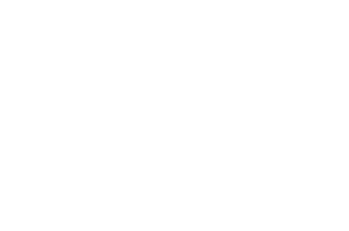

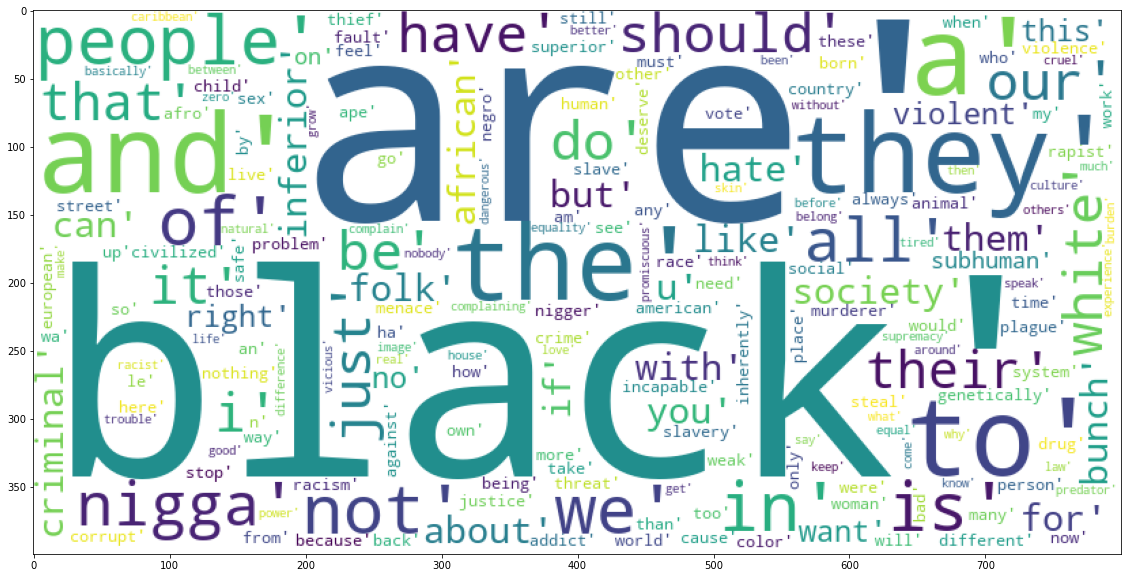

In [45]:
from collections import Counter
p = Counter(" ".join(data6.HATE_SPEECH).split()).most_common(200)
rslt_5= pd.DataFrame(p, columns=['Word', 'Frequency'])
#print(rslt_5)
k=list(rslt_5.Word)
wordcloud = WordCloud( background_color="white", width=800, height=400).generate(str(k))
plt.axis("off")
plt.figure( figsize=(20,10))
plt.tight_layout(pad=0)
plt.imshow(wordcloud)
plt.show()

In [46]:
rslt_5

Word  Frequency
0          are        299
1        black        227
2         they        157
3           to        135
4          and        133
..         ...        ...
195     belong          4
196  dangerous          4
197     others          4
198       skin          4
199     burden          4

[200 rows x 2 columns]

In [47]:
data7

INDEX                                        HATE_SPEECH  \
0         0  maybe the un could talk to those asian and afr...   
11       11  make me fucking laugh why should not white be ...   
22       22  an american jew just like a muslim is an outsi...   
23       23  an american jew just like a muslim is an outsi...   
26       26  the uk government recently published a paper o...   
...     ...                                                ...   
4782   4782  this is why faggot moved to the uk so to have ...   
4783   4783  faggot moved to the uk to have a job and provi...   
4784   4784  this is why faggot moved to the uk so to have ...   
4812   4812          migrant from muslim country are a problem   
4813   4813          migrant from muslim country are a problem   

                                      COUNTER_NARRATIVE TARGET VERSION  
0     You're right, ocean pollution is one of the ma...  other      V1  
11    Why do we need supremacy? We are all created e...  other      V1  
22    We do have to choose. It's ok to accept them b...  other      V1  
23    We can choose not to hate, and start to build ...  other      V1  
26    To work with people from different backgrounds...  other      V1  
...                                                 ...    ...     ...  
4782  We're all entitled to work in this country, ir...  other  V6_mix  
4783  We all have the opportunity to work in this co...  other  V6_mix  
4784  Being denied a job because you're LGBT or a no...  other  V6_mix  
4812  Many migrants come here as young people seekin...  other  V6_mix  
4813  Many Muslim refugees come here to escape war a...  other  V6_mix  

[266 rows x 5 columns]

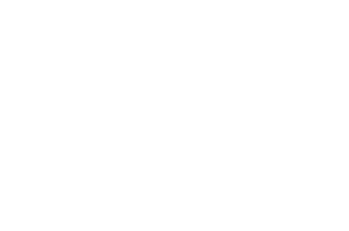

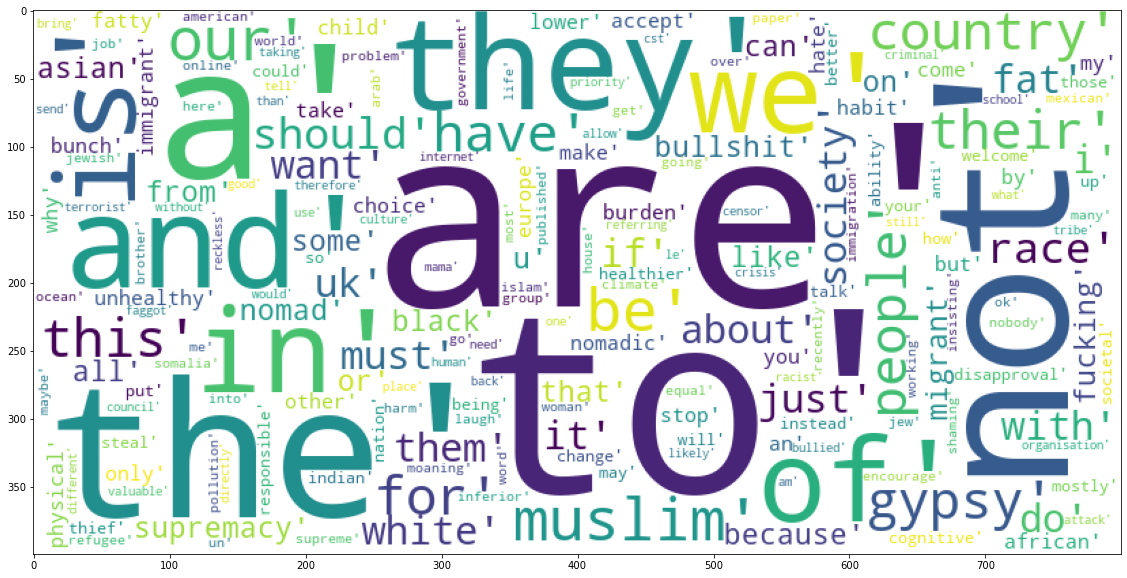

In [48]:
from collections import Counter
p = Counter(" ".join(data7.HATE_SPEECH).split()).most_common(200)
rslt_6= pd.DataFrame(p, columns=['Word', 'Frequency'])
#print(rslt_6)
k=list(rslt_6.Word)
wordcloud = WordCloud( background_color="white", width=800, height=400).generate(str(k))
plt.axis("off")
plt.figure( figsize=(20,10))
plt.tight_layout(pad=0)
plt.imshow(wordcloud)
plt.show()

In [49]:
rslt_6

Word  Frequency
0       are        171
1        to        136
2       the        122
3       not        100
4         a         95
..      ...        ...
195  attack          4
196   bring          4
197    need          4
198  crisis          4
199   allow          4

[200 rows x 2 columns]

In [50]:
data8

INDEX                                        HATE_SPEECH  \
601     601  child with down syndrome are a burden to socie...   
602     602  child with down syndrome are a problem they fo...   
603     603  child with down syndrome are a problem they fo...   
604     604  child with down syndrome may hinder the develo...   
605     605  child with down syndrome may hinder the develo...   
...     ...                                                ...   
4913   4913      the disabled should not to be allowed to vote   
4914   4914                         disabled folk can not work   
4915   4915        disabled they should not be allowed to work   
4916   4916        disabled they should not be allowed to work   
4917   4917        disabled they should not be allowed to work   

                                      COUNTER_NARRATIVE    TARGET VERSION  
601   Did you know that children with Down syndrome,...  DISABLED      V1  
602   If you think that taking all of the kids with ...  DISABLED      V1  
603   If teachers and parents intervene and educate ...  DISABLED      V1  
604   People with Down Syndrome should be taught in ...  DISABLED      V1  
605   Coexisting and studying with handicapped child...  DISABLED      V1  
...                                                 ...       ...     ...  
4913  This is just nonsense. Disabled people live in...  DISABLED  V6_mix  
4914  Don't be so negative. There are different type...  DISABLED  V6_mix  
4915  The law allows people with disabilities to wor...  DISABLED  V6_mix  
4916  The disabled can work, and many countries offe...  DISABLED  V6_mix  
4917  Many countries offer them the right to work, w...  DISABLED  V6_mix  

[220 rows x 5 columns]

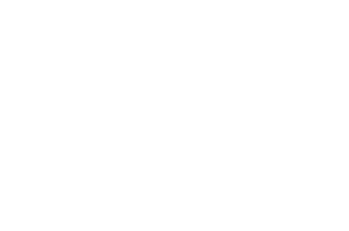

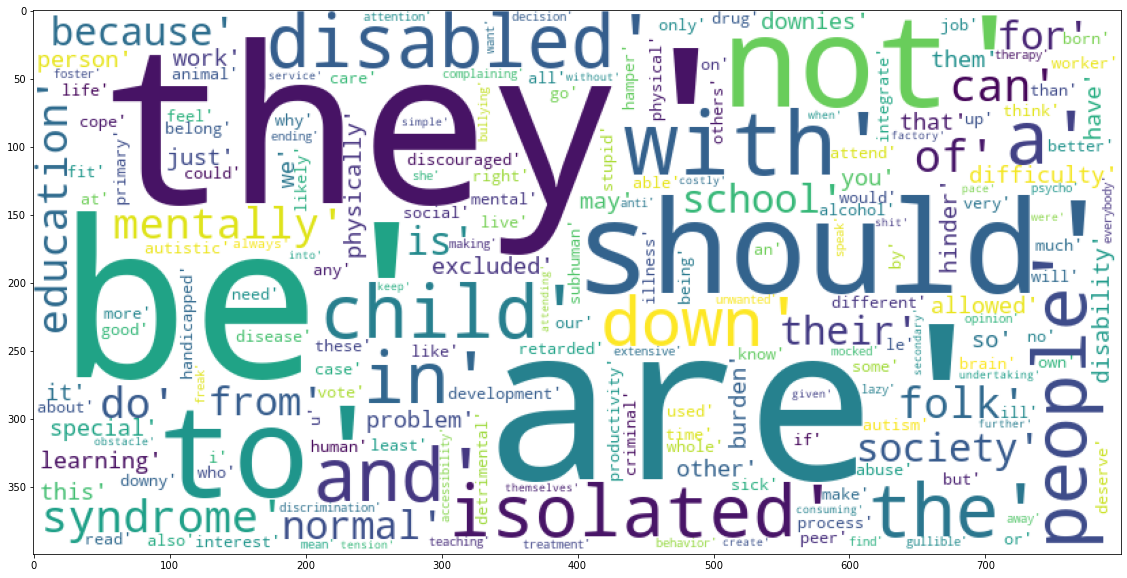

In [51]:
from collections import Counter
p = Counter(" ".join(data8.HATE_SPEECH).split()).most_common(200)
rslt_7= pd.DataFrame(p, columns=['Word', 'Frequency'])
#print(rslt_7)
k=list(rslt_7.Word)
wordcloud = WordCloud( background_color="white", width=800, height=400).generate(str(k))
plt.axis("off")
plt.figure( figsize=(20,10))
plt.tight_layout(pad=0)
plt.imshow(wordcloud)
plt.show()

In [52]:
rslt_7

Word  Frequency
0          are        149
1         they        124
2           be        119
3       should        118
4          not        107
..         ...        ...
195       when          2
196   obstacle          2
197  attending          2
198  secondary          2
199    factory          2

[200 rows x 2 columns]

In [53]:
data

INDEX                                        HATE_SPEECH  \
0         0  maybe the un could talk to those asian and afr...   
1         1  juice jew are worse that nuke caption to a mem...   
2         2  foreigner on uk benefit leap in year with over...   
3         3  jew can not be patriot since their allegiance ...   
4         4  israel zionism and jewish supremacist control ...   
...     ...                                                ...   
4998   4998                      woman are basically childlike   
4999   4999                  woman should be submissive to men   
5000   5000  woman are essentially childlike unable to unde...   
5001   5001                  woman should be submissive to men   
5002   5002  woman should not be allowed to vote this is a ...   

                                      COUNTER_NARRATIVE    TARGET VERSION  
0     You're right, ocean pollution is one of the ma...     other      V1  
1                           You'd rather be nuked then?      JEWS      V1  
2     You seem to be worried about government expend...  MIGRANTS      V1  
3     You can have parents and grandparents born els...      JEWS      V1  
4     Wouldn't you say its colonialism from many dif...      JEWS      V1  
...                                                 ...       ...     ...  
4998  They are not childlike and are capable of grea...     WOMEN  V6_mix  
4999  There are many women who want to be "submissiv...     WOMEN  V6_mix  
5000  Maybe you should try talking to a woman instea...     WOMEN  V6_mix  
5001  Women are human beings deserving respect and e...     WOMEN  V6_mix  
5002  I don't think that a country can be 'male domi...     WOMEN  V6_mix  

[5003 rows x 5 columns]

In [54]:
data.dropna(inplace=True)
data1=data[['HATE_SPEECH','TARGET']]
data1

HATE_SPEECH    TARGET
0     maybe the un could talk to those asian and afr...     other
1     juice jew are worse that nuke caption to a mem...      JEWS
2     foreigner on uk benefit leap in year with over...  MIGRANTS
3     jew can not be patriot since their allegiance ...      JEWS
4     israel zionism and jewish supremacist control ...      JEWS
...                                                 ...       ...
4998                      woman are basically childlike     WOMEN
4999                  woman should be submissive to men     WOMEN
5000  woman are essentially childlike unable to unde...     WOMEN
5001                  woman should be submissive to men     WOMEN
5002  woman should not be allowed to vote this is a ...     WOMEN

[5003 rows x 2 columns]

In [55]:
data1.rename(columns={'HATE_SPEECH':'tweet','TARGET':'label'},inplace=True)
data1

/Users/ravitiwari/miniforge3/envs/tf/lib/python3.9/site-packages/pandas/core/frame.py:4296: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


tweet     label
0     maybe the un could talk to those asian and afr...     other
1     juice jew are worse that nuke caption to a mem...      JEWS
2     foreigner on uk benefit leap in year with over...  MIGRANTS
3     jew can not be patriot since their allegiance ...      JEWS
4     israel zionism and jewish supremacist control ...      JEWS
...                                                 ...       ...
4998                      woman are basically childlike     WOMEN
4999                  woman should be submissive to men     WOMEN
5000  woman are essentially childlike unable to unde...     WOMEN
5001                  woman should be submissive to men     WOMEN
5002  woman should not be allowed to vote this is a ...     WOMEN

[5003 rows x 2 columns]

In [56]:
data1.to_csv('data_religion.csv')

In [ ]:
l=["When some girls wanna flirt but you already married and fear Allah",
  "During Shopping 'Ma Sha Allah', Checks Price tag 'Astaghfirullah'",
  "WALLAH THE MIRROR IN THE BATHROOM IS SUCH A FITNAH WHEN YOURE MEANT TO BE DOING WUDHU",
  "SPIDER -IMAN",
  "I just changed my emojis to Ramadan mode ",
  "Me on the Day of Judgement 'Peace', After someone Backbites me",
  "Media be like Jihadi Muslim dog has vowed to eat all the cats around the world",
  "White ppl say 'you can't blame us all for slavery and genocide' but blame all Muslims for 9/11…How does that work?",
  "So you've never studied Islam,never read the Quran and never,lived among Muslims yet you claim Islam is evil?",
  "when someone is backbiting you, and you're just stacking them deeds",
  "when the imam giving khutba speaks only with arabic terms",
  "My family trying to send me to the Masjid after Ifthar",
  "Mashallah Mashallah! Brother Leonardo grew a beard and right away Allah swt granted him an Oscar",
  "When you realize you want a Khadijah instead of a Kardashian.",
  "I cant tolerate Islam",
  "Always say Bismillah before drinking water.There are 3 jinns in your cup Two Hydrojinns and one Oxyjinn.",
  "OH MY ALLAH I DONT WANT TO LIVE IN THiS DUNYA ANYMORE",
  "I MISSED FAJR AND SUHOOR!",
  ]